In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## Loading the data

In [2]:
df=pd.read_csv('reviews.csv',encoding='utf-8')
df.sample(10)

,Sentence,Sentiment
968,সঁচাকৈয়ে এডাল ধুনীয়া শব্দৰ মালা,1
874,আপুনি এটা ভয়ংকৰ কাম কৰিছে,0
797,এনেকুৱা বিহুগীত পাৰিলে আৰু কৰিবচোন,1
563,সেই ছোৱালীজনী চিকিৎসক নহয় তাইক এজন চিকিৎসকৰ প...,0
473,মোৰ কানৰ পৰা তেজ ওলাই আহিলে,0
568,কাতি বিহুৰ ক্ষণত লগাই অকলে নাচি আছো ৰুমতে,1
658,গান চুৰ কৰা এৰি এটা টো গান নিজে বনা,0
922,কিমানবাৰ শুনিলো যদিও হেঁপাহ পেলোৱা নাই,1
397,শুনিলেই নাছো নাছো লাগি যায়।,1
788,কি দিন যে আহিল নহয়,0


In [3]:
df.shape

(1028, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   1028 non-null   object
 1   Sentiment  1028 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.2+ KB


In [5]:
#checking missing values
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

## Removing duplicate values

In [6]:
#check for duplicate values
df.duplicated().sum()

11

In [7]:
#removing duplicates
df.drop_duplicates(subset ="Sentence",
                     keep ='first', inplace = True)
df.shape

(1016, 2)

# EDA

## Distribution of positive and negative sentences

In [8]:
df['Sentiment'].value_counts()

0    519
1    497
Name: Sentiment, dtype: int64

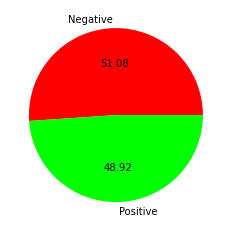

In [9]:
plt.pie(df['Sentiment'].value_counts(),labels=['Negative','Positive'],colors=['red','lime'],autopct="%0.2f")
plt.show()

## Number of characters in each sentence

In [10]:
df['num_char']=df['Sentence'].apply(len)

In [11]:
df.head()

,Sentence,Sentiment,num_char
0,এই গানটো কোনে লিখিছিল নো?,1,25
1,মাকচুদু,0,7
2,বৰ্তমান সময়ত এনেকুৱা মধুৰ গীত শুনিবলৈ পোৱা বহু...,1,53
3,কি গান গাবলৈ আহি ছ,0,19
4,গানটো গাবলৈ লাজ নাই,0,19


## Number of words in each sentence

In [12]:
df['num_words']=df['Sentence'].apply(lambda x:len(nltk.word_tokenize(x)))

In [13]:
df.head()

,Sentence,Sentiment,num_char,num_words
0,এই গানটো কোনে লিখিছিল নো?,1,25,6
1,মাকচুদু,0,7,1
2,বৰ্তমান সময়ত এনেকুৱা মধুৰ গীত শুনিবলৈ পোৱা বহু...,1,53,9
3,কি গান গাবলৈ আহি ছ,0,19,5
4,গানটো গাবলৈ লাজ নাই,0,19,4


In [14]:
df[['num_char','num_words']].describe()

,num_char,num_words
count,1016.000000,1016.000000
mean,32.819882,6.348425
std,22.159343,4.245503
min,3.000000,1.000000
25%,17.000000,3.000000
50%,28.000000,5.000000
75%,43.000000,8.000000
max,168.000000,34.000000


In [15]:
#positive sentiment
df[df['Sentiment']==1][['num_char','num_words']].describe()

,num_char,num_words
count,497.000000,497.000000
mean,36.597586,7.024145
std,24.077308,4.611895
min,3.000000,1.000000
25%,19.000000,4.000000
50%,31.000000,6.000000
75%,47.000000,9.000000
max,168.000000,34.000000


In [16]:
#negative sentiment
df[df['Sentiment']==0][['num_char','num_words']].describe()

,num_char,num_words
count,519.000000,519.000000
mean,29.202312,5.701349
std,19.500409,3.754202
min,3.000000,1.000000
25%,15.000000,3.000000
50%,25.000000,5.000000
75%,38.000000,7.000000
max,143.000000,28.000000


## Data cleaning

In [17]:
def transform_text(text):
    #tokenizing
    text=nltk.word_tokenize(text)
    stop=['অতএব', 'অথচ', 'অথবা', 'অধঃ', 'অন্ততঃ', 'অৰ্থাৎ', 'অৰ্থে', 'আও', 'আঃ', 'আচ্ছা', 'আপাততঃ', 'আয়ৈ', 'আৰু',
      'আস্', 'আহা', 'আহাহা', 'ইতস্ততঃ', 'ইতি', 'ইত্যাদি', 'ইস্', 'ইহ', 'উঃ', 'উৱা', 'উস্', 'এতেকে', 'এথোন',
      'ঐ', 'ওঁ', 'ওৰফে', 'ঔচ্', 'কি', 'কিম্বা', 'কিন্তু', 'কিয়নো', 'কেলেই', 'চোন', 'ছাৰি', 'ছিকৌ', 'ছেই',
      'ঠাহ্', 'ঢেঁট্', 'তত', 'ততক', 'ততেক', 'তেতেক', 'ততেক', 'তত্ৰাচ', 'তথা', 'তথৈবচ', 'তাতে', 'তেও',
      'তো', 'তৌৱা', 'দেই', 'দেহি', 'দ্বাৰা', 'ধৰি', 'ধিক্', 'নতুবা', 'নি', 'নো', 'নৌ', 'পৰা', 'পৰ্যন্ত',
      'বৰঞ্চ', 'বহিঃ', 'বাবে', 'বাৰু', 'বাহ্', 'বাহিৰে', 'বিনে', 'বে', 'মতে', 'যথা', 'যদি', 'যদ্যপি', 'যে',
      'যেনিবা', 'যেনে', 'যোগে', 'লৈ', 'সত্ত্বে', 'সমন্ধি', 'সম্প্ৰতি', 'সহ', 'সু', 'সেইদেখি', 'সৈতে', 'স্বতঃ', 'হঞে', 'হতুৱা', 'হন্তে',
      'হবলা', 'হয়', 'হা', 'হুঁ', 'হুই', 'হে', 'হেই', 'হেঃ', 'হেতুকে', 'হেনে', 'হেনো', 'হেৰ', 'হেৰি', 'হৈ', 'হোঁ', 'ইঃ', 'ইচ্',
      'চুহ্', 'চুঃ', 'আঁ']
    punc="!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।"
    puncword=[]
    #removing stopwords and punctuations
    for i in punc:
         puncword.append(i)
    y=[]
    for i in text:
        if i not in stop and i not in punc:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        i=''.join(j for j in i if not j in puncword)
        y.append(i)
    return " ".join(y)

In [18]:
transform_text('এই গানটোৱে আপোনাক অকলশৰীয়া হৈ থাকিব বিচাৰে আৰ...')

'এই গানটোৱে আপোনাক অকলশৰীয়া থাকিব বিচাৰে আৰ '

In [19]:
df['cleaned_sentence']=df['Sentence'].apply(transform_text)

In [20]:
df.sample(10)

,Sentence,Sentiment,num_char,num_words,cleaned_sentence
462,বাল গান,0,7,2,বাল গান
959,বোইনাকচুদা,0,10,1,বোইনাকচুদা
274,মই তোমাৰ গান শুনাতকৈ কাউৰীৰ মাত টো পছন্দ কৰিম,0,45,9,মই তোমাৰ গান শুনাতকৈ কাউৰীৰ মাত টো পছন্দ কৰিম
504,কিংবদন্তী,1,9,1,কিংবদন্তী
678,সৰুতে মূৰত দূখ পাইছিলা নেকি বাৰু,0,33,6,সৰুতে মূৰত দূখ পাইছিলা নেকি
284,আজিও শুনি আছে,1,13,3,আজিও শুনি আছে
245,মন'লৈ গভীৰ প্ৰশান্তি অনা এটি গীত ।নিজ'কে হেৰুৱ...,1,112,26,মন গভীৰ প্ৰশান্তি অনা এটি গীত নিজ কে হেৰুৱাই গ...
381,গৰু চোৰ,0,7,2,গৰু চোৰ
256,মক্কেল,0,6,1,মক্কেল
42,সঁচাকৈ অদ্ভূত আৰু মোহনীয় গান,1,29,5,সঁচাকৈ অদ্ভূত মোহনীয় গান


In [44]:
df['cleaned_sentence'].shape

(1016,)

## Most frequent words in positive and negative sentences

In [31]:
positive_corpus=[]
for snt in df[df['Sentiment']==1]['cleaned_sentence'].tolist():
    for word in snt.split():
        positive_corpus.append(word)
        

In [33]:
len(positive_corpus)

3193

In [34]:
from collections import Counter

In [35]:
Counter(positive_corpus).most_common(30)

[('এই', 77),
 ('ভাল', 74),
 ('গান', 73),
 ('গীত', 57),
 ('মই', 56),
 ('গানটো', 49),
 ('শুনি', 45),
 ('বহুত', 40),
 ('বিহু', 39),
 ('সুন্দৰ', 35),
 ('মোৰ', 31),
 ('ইমান', 28),
 ('এটা', 27),
 ('মন', 25),
 ('লাগিল', 22),
 ('নাই', 21),
 ('কৰি', 19),
 ('এনেকুৱা', 18),
 ('অসমীয়া', 18),
 ('এইটো', 18),
 ('পাওঁ', 18),
 ('লাগে', 17),
 ('এটি', 16),
 ('আপোনাৰ', 15),
 ('মজা', 14),
 ('এক', 14),
 ('অনুভৱ', 13),
 ('শুনিলে', 13),
 ('পুৰণি', 12),
 ('গানটোৰ', 12)]

In [38]:
negative_corpus=[]
for snt in df[df['Sentiment']==0]['cleaned_sentence'].tolist():
    for word in snt.split():
        negative_corpus.append(word)
Counter(negative_corpus).most_common(30)

[('গান', 91),
 ('এই', 51),
 ('নাই', 48),
 ('মই', 39),
 ('গানটো', 29),
 ('এইটো', 29),
 ('কৰি', 29),
 ('বেয়া', 27),
 ('এটা', 24),
 ('ভাল', 24),
 ('মোৰ', 24),
 ('কৰা', 22),
 ('শুনি', 21),
 ('আপোনাৰ', 21),
 ('নেকি', 19),
 ('আপুনি', 19),
 ('হৈছে', 18),
 ('গীত', 17),
 ('কৰক', 16),
 ('কেলা', 16),
 ('পাগল', 16),
 ('ইমান', 14),
 ('আছে', 14),
 ('হ', 13),
 ('কৰিব', 13),
 ('পিছত', 13),
 ('অসমীয়া', 13),
 ('টো', 12),
 ('কাম', 12),
 ('ভিডিঅ', 11)]

In [39]:
len(negative_corpus)

2754

## Feature extraction

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [401]:
cv=CountVectorizer(max_features=550)
tfidf=TfidfVectorizer(max_features=500)

In [402]:
X = tfidf.fit_transform(df['cleaned_sentence']).toarray()

In [403]:
X.shape

(1016, 500)

In [405]:
Y=df['Sentiment'].values

In [406]:
Y.shape

(1016,)

## Train test split

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [425]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(812, 500) (204, 500)
(812,) (204,)


In [419]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## Training our model with different classifying algorithms

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [411]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbdt=GradientBoostingClassifier()

In [412]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AB':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [413]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    return accuracy,precision

In [438]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy- ", current_accuracy)
    print("Precision- ",current_precision)

For SVC
Accuracy-  0.75
Precision-  0.7009345794392523
For KN
Accuracy-  0.6764705882352942
Precision-  0.6891891891891891
For NB
Accuracy-  0.7450980392156863
Precision-  0.6875
For DT
Accuracy-  0.5931372549019608
Precision-  0.9230769230769231
For LR
Accuracy-  0.7647058823529411
Precision-  0.7169811320754716
For RF
Accuracy-  0.7892156862745098
Precision-  0.7684210526315789
For AB
Accuracy-  0.7058823529411765
Precision-  0.6931818181818182
For BC
Accuracy-  0.75
Precision-  0.7590361445783133
For ETC
Accuracy-  0.7990196078431373
Precision-  0.7676767676767676
For GBDT
Accuracy-  0.7401960784313726
Precision-  0.7530864197530864


In [434]:
#best accuracy by extra trees classifier (80% approx)
etc.fit(X_train,Y_train)
Y_pred2=etc.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.803921568627451
[[88 22]
 [18 76]]
0.7755102040816326


## Confusion matrix

<AxesSubplot:>

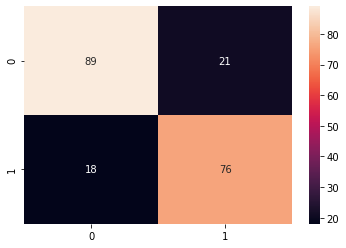

In [423]:
sns.heatmap(confusion_matrix(Y_test,Y_pred2), annot=True)

## Exporting the model and vectorizer

In [426]:
import pickle

In [427]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))